In [338]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [275]:
%%time
#read data from xls
df = pd.read_excel('PERM_FY2020_Q3.xlsx')

Wall time: 1min 14s


In [276]:
%%time
#read data from csv
#df = pd.read_csv('PERM_FY2020_Q3.csv', encoding= 'unicode')
#a.encode('utf-8').strip()

Wall time: 0 ns


In [277]:
# filter case statuses that are not withdrawn as including them could lead to misleading insights
df = df[df.CASE_STATUS != 'Withdrawn']

# create binary variables between cases that are denied vs certified
# denied cases will have a binary variable of 1 while certified cases will have a binary variable of 0
case_status = []
case_status_binary = []
for i in df.CASE_STATUS:
    if i == 'Denied':
        case_status.append('Denied')
        case_status_binary.append(1)
    else:
        case_status.append('Certified')
        case_status_binary.append(0)
       
df['CASE_STATUS'] = case_status
df['CASE_STATUS_BINARY'] = case_status_binary

df.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_INFO_DECL_TITLE,CASE_STATUS_BINARY
0,A-09245-62715,Denied,2009-09-03,2020-04-30 14:50:29,N,NaT,NaN,N,SATURN ENTERPRISES INC,2340 N WASHTENAW AVE,...,N,N,N,N,Christopher E Kurczaba,Attorney,kurczabalaw@sbcglobal.net,Zygmunt Oparowski,President,1
1,A-10119-96737,Certified,2010-03-29,2019-10-18 11:34:37,Y,2000-09-15,MARYLAND,N,FIL PARONG,13528 JAMIESON PL,...,N,N,N,N,WINSTON W TSAI,ATTORNEY AT LAW,WINSTONTSAI@AOL.COM,FIL PARONG,HEAD OF HOUSEHOLD,0
2,A-10225-13679,Denied,2010-08-10,2020-04-30 07:55:08,N,NaT,NaN,N,GLENNS PLUMBING SERVICES,854 CUSTER STREET,...,N,N,N,N,DANIEL J SULLIVAN,ATTORNEY,GWG8@AOL.COM,DAVID GLENN,OWNER,1
3,A-11033-51540,Certified,2011-02-03,2020-05-28 08:38:56,N,NaT,NaN,N,SKILLNET SOLUTIONS INC.,1901 SOUTH BASCOM AVENUE,...,N,N,Y,N,Sonal Kinger,Attorney at Law,sonal.kinger@bakerlawcorp.com,Jack Grover,VP of Finance and Operations,0
4,A-11074-62984,Denied,2011-03-10,2020-06-17 07:50:52,N,NaT,NaN,N,"R L CONSTRUCTION, INC.",904 NEPPERHAN AVENUE,...,N,N,N,N,DENISE S DUTTON,NONATTORNEY,NaN,RITA O SULLIVAN,MANAGER,1


In [278]:
#Check columns and data types in df
df.info(verbose=1,null_counts=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69117 entries, 0 to 71650
Data columns (total 155 columns):
CASE_NUMBER                         69117 non-null object
CASE_STATUS                         69117 non-null object
RECEIVED_DATE                       69117 non-null datetime64[ns]
DECISION_DATE                       69117 non-null datetime64[ns]
REFILE                              69117 non-null object
ORIG_FILE_DATE                      69 non-null datetime64[ns]
PREVIOUS_SWA_CASE_NUMBER_STATE      71 non-null object
SCHD_A_SHEEPHERDER                  69114 non-null object
EMPLOYER_NAME                       69117 non-null object
EMPLOYER_ADDRESS_1                  69115 non-null object
EMPLOYER_ADDRESS_2                  23020 non-null object
EMPLOYER_CITY                       69117 non-null object
EMPLOYER_STATE_PROVINCE             69116 non-null object
EMPLOYER_COUNTRY                    69100 non-null object
EMPLOYER_POSTAL_CODE                69114 non-null object
EM

In [279]:
#Filter out relevant features for analysis of Education and Job Characteristics differences between Certified / Denied applicants

df = df[['CASE_NUMBER', 
         'CASE_STATUS',
         'CASE_STATUS_BINARY',
         'PW_TRACK_NUMBER',
         'PW_SOC_CODE',
         'PW_SOC_TITLE',
         'PW_SKILL_LEVEL',
         'PW_WAGE',
         'PW_UNIT_OF_PAY',
         'PW_WAGE_SOURCE',
         'PW_SOURCE_NAME_OTHER',
         'PW_DETERMINATION_DATE',
         'PW_EXPIRATION_DATE',
         'WAGE_OFFER_FROM',
         'WAGE_OFFER_TO',
         'WAGE_OFFER_UNIT_OF_PAY',
         'WORKSITE_ADDRESS_1',
         'WORKSITE_ADDRESS_2',
         'WORKSITE_CITY',
         'WORKSITE_STATE',
         'WORKSITE_POSTAL_CODE',
         'JOB_TITLE',
         'MAJOR_FIELD_OF_STUDY',
         'FOREIGN_WORKER_EDUCATION',
         'FOREIGN_WORKER_EDUCATION_OTHER',
         'FOREIGN_WORKER_INFO_MAJOR',
         'FOREIGN_WORKER_YRS_ED_COMP',
         'FOREIGN_WORKER_INST_OF_ED',
         'FOREIGN_WORKER_ED_INST_ADD_1',
         'FOREIGN_WORKER_ED_INST_ADD_2',
         'FOREIGN_WORKER_ED_INST_CITY',
         'FOREIGN_WORKER_ED_INST_STATE_P',
         'FOREIGN_WORKER_ED_INST_COUNTRY',
         'FOREIGN_WORKER_ED_INST_POST_CD'
        ]]

In [280]:
df.head()

,CASE_NUMBER,CASE_STATUS,CASE_STATUS_BINARY,PW_TRACK_NUMBER,PW_SOC_CODE,PW_SOC_TITLE,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,PW_WAGE_SOURCE,...,FOREIGN_WORKER_EDUCATION_OTHER,FOREIGN_WORKER_INFO_MAJOR,FOREIGN_WORKER_YRS_ED_COMP,FOREIGN_WORKER_INST_OF_ED,FOREIGN_WORKER_ED_INST_ADD_1,FOREIGN_WORKER_ED_INST_ADD_2,FOREIGN_WORKER_ED_INST_CITY,FOREIGN_WORKER_ED_INST_STATE_P,FOREIGN_WORKER_ED_INST_COUNTRY,FOREIGN_WORKER_ED_INST_POST_CD
0,A-09245-62715,Denied,1,NaN,43-6011.00,administrative assistant,Level I,14.49,Hour,OES,...,NaN,GENERAL,1996.0,LICEUM EKONOMICZNE,UL. JANA GOETZA,NaN,BRZESKO,NaN,POLAND,32-800
1,A-10119-96737,Certified,0,MD00020468,49-9042.00,"MAINTENANCE REPAIR WORKER, GENERAL",Level III,19.36,Hour,OES,...,NaN,HIGH SCHOOL,1991.0,SAN JACINTO NATIONAL HIGH SCHOOL,10 BARANGAY GUIBEL ST,NaN,SAN JACINTO,BARANGAY,PHILIPPINES,NaN
2,A-10225-13679,Denied,1,P10010067706999,47-2152.02,PLUMBER,Level IV,78645.00,Year,OES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A-11033-51540,Certified,0,P10010223453518,15-1031.00,"Comp. SWE, Applications",Level IV,131518.00,Year,OES,...,EQUIV. OF BS BASED ON COMBO OF DIPLOMAS,ELECTRONICS ENGINEERING COMPUTER SCIENCE,1996.0,SHRI BAHAGUBHAI MAFATLAL POLYTECHNIC INSTITUTE,"IRLA LANE, VILE PARLE W",NaN,MUMBAI,MAHARASHTRA,INDIA,400056
4,A-11074-62984,Denied,1,P10010244002722,47-1011.01,FIRST LINE SUPERVISORS CONSTRUCTION TRADES WO...,Level I,53643.00,Year,OES,...,NaN,GENERAL,1995.0,FALCARRAGH HIGH SCHOOL,NaN,NaN,FALCARRAGH,NaN,IRELAND,NaN


In [281]:
#Create a function to quickly retrieve relevant information from columns of feature data (particularly useful for summarizing columns of categorical variables)
############vs Describe()??

def column_info(df, column):
    print("Total Values:",len(df[column]))
    print("Total Non-NaaN Values:",df[column].count())
    print("Total NaaN Values:",(len(df[column]) - df[column].count()))
    print("% NaaN Values",(len(df[column]) - df[column].count())/df[column].count())
    print(df[column].value_counts())
    print(df[column].value_counts()/df[column].count())


In [282]:
#Evaluate case status breakdown
column_info(df,'CASE_STATUS')

Total Values: 69117
Total Non-NaaN Values: 69117
Total NaaN Values: 0
% NaaN Values 0.0
Certified    66235
Denied        2882
Name: CASE_STATUS, dtype: int64
Certified    0.958303
Denied       0.041697
Name: CASE_STATUS, dtype: float64


### Analyze relationship between prevailing wages for jobs and case outcomes

In [283]:
column_info(df,'PW_UNIT_OF_PAY')

Total Values: 69117
Total Non-NaaN Values: 69107
Total NaaN Values: 10
% NaaN Values 0.00014470314150520207
Year         68272
Hour           809
Week            12
Month            9
Bi-Weekly        5
Name: PW_UNIT_OF_PAY, dtype: int64
Year         0.987917
Hour         0.011706
Week         0.000174
Month        0.000130
Bi-Weekly    0.000072
Name: PW_UNIT_OF_PAY, dtype: float64


In [284]:
#Validate various units of pay
df.loc[df['PW_UNIT_OF_PAY'] == 'Bi-Weekly']['PW_WAGE'].head()

1337     1400.0
23816    1000.0
31720    4075.2
56015    1923.0
70672    2500.0
Name: PW_WAGE, dtype: float64

In [286]:
#Test BEFORE
df['PW_WAGE'].iloc[0,]

14.49

In [287]:
#Drop Null values prior to annualizing wages
df = df[df['PW_UNIT_OF_PAY'].notna()]

#Annualize wage
counter = 0
annualized_wage = list()

for i in df['PW_UNIT_OF_PAY']:
    if i == 'Year':
        annualized_wage.append(df['PW_WAGE'].iloc[counter,])
    elif i == 'Hour':
        annualized_wage.append(df['PW_WAGE'].iloc[counter,] * 2080)
    elif i == 'Week':
        annualized_wage.append(df['PW_WAGE'].iloc[counter,] * 52)
    elif i == 'Month':
        annualized_wage.append(df['PW_WAGE'].iloc[counter,] * 12)
    elif i == 'Bi-Weekly':
        annualized_wage.append(df['PW_WAGE'].iloc[counter,] * 26)
#    else:
#       annualized_wage.append('0')
    
    counter = counter + 1

#print(annualized_wage)
df['Annualized_Wage'] =  annualized_wage

In [288]:
#Test - AFTER
df['Annualized_Wage'].iloc[0,] / 2080

14.49

### Analyze relationship between education, job skill level, and wages

In [314]:
#Create dataframe stripping out Null values in Education column
df1 = df[df['FOREIGN_WORKER_EDUCATION'].notna()]

#Analyze quick metrics on column
pd.DataFrame(df1['Annualized_Wage'].describe())

,Annualized_Wage
count,69101.000000
mean,89976.088510
std,37793.167545
min,14892.800000
25%,65520.000000
50%,92810.000000
75%,114338.000000
max,466240.000000


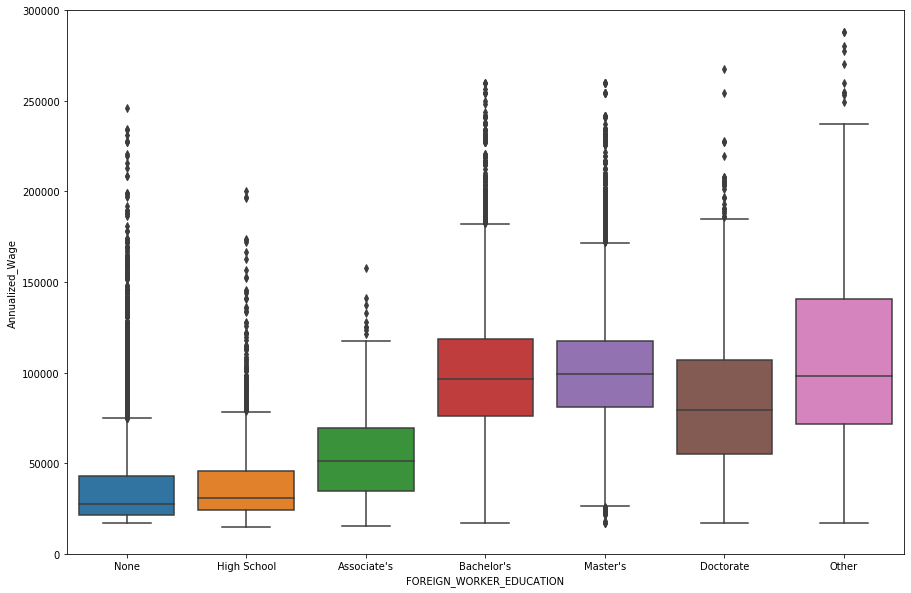

In [291]:
#Create order for plotting Education Level and Wage
k = ['None','High School',"Associate's","Bachelor's","Master's",'Doctorate','Other']

plt.figure(figsize = (15,10))
sns.boxplot(x = 'FOREIGN_WORKER_EDUCATION', 
            y = 'Annualized_Wage', data = df1, order = k)

plt.ylim(0, 300000)
plt.show()

#df1['FOREIGN_WORKER_EDUCATION'].head()
#df1.info(verbose=1)

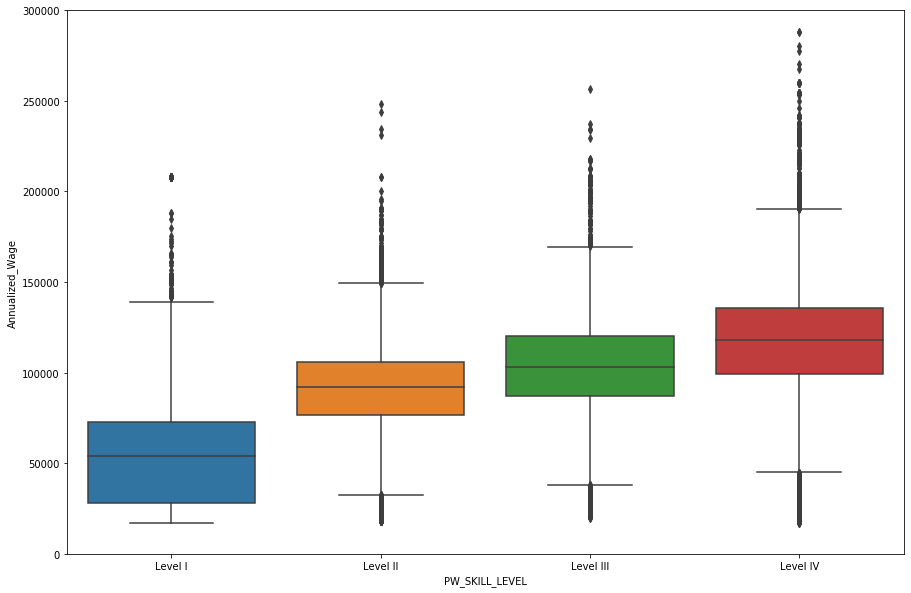

In [292]:
#Create order for plotting Job Skill Level and Wage
k = ['Level I','Level II',"Level III","Level IV"]

plt.figure(figsize = (15,10))
sns.boxplot(x = "PW_SKILL_LEVEL", 
            y = 'Annualized_Wage', data = df1, order = k)

plt.ylim(0, 300000)
plt.show()

#df1['FOREIGN_WORKER_EDUCATION'].head()
#df1.info(verbose=1)

### Analyze relationship between education, job skill level, wages and case outcomes

In [294]:
#Filter on certified cases
df.loc[df['CASE_STATUS'] == 'Certified']['Annualized_Wage'].head()

1     40268.8
3    131518.0
6     92830.0
7     74630.0
9     42530.0
Name: Annualized_Wage, dtype: float64

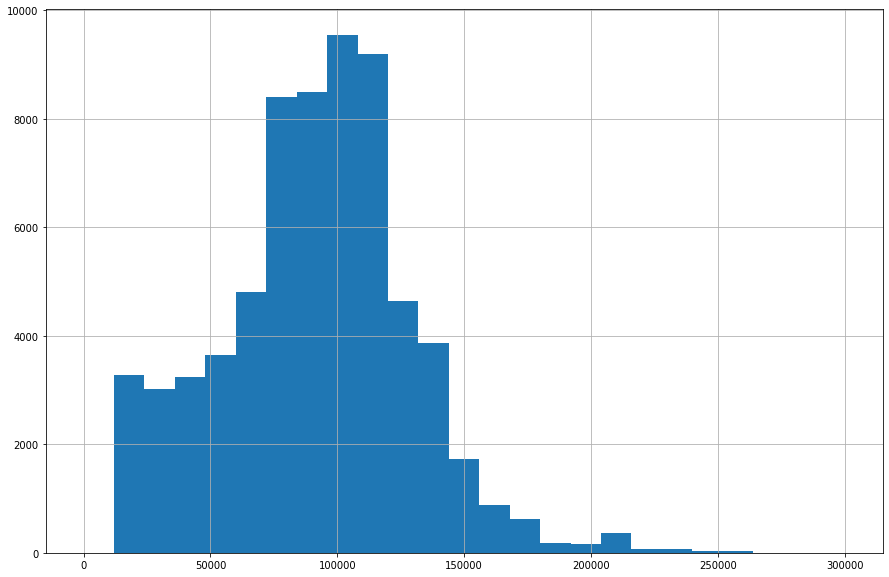

In [295]:
##### FLAG FOR FINAL #####
#Analyze histogram of annualized wages for certified case outcomes
plt.figure(figsize = (15,10))
df.loc[df['CASE_STATUS'] == 'Certified']['Annualized_Wage'].hist(bins = 25, range = [0,300000])

Text(-49.0775, 542.5875, 'Median: 49,078')

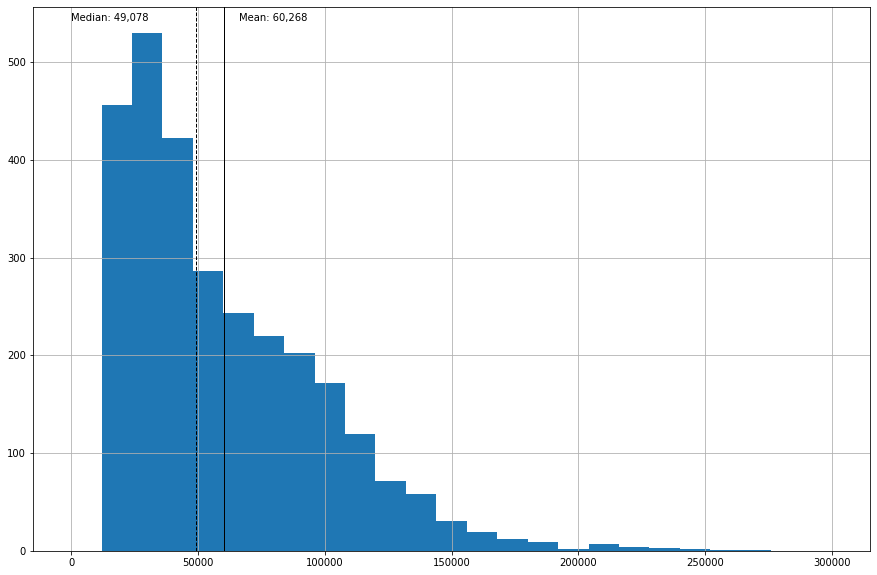

In [337]:
##### FLAG FOR FINAL #####
#Analyze histogram of annualized wages for denied case outcomes
plt.figure(figsize = (15,10))

df.loc[df['CASE_STATUS'] == 'Denied']['Annualized_Wage'].hist(bins = 25, range = [0,300000])
#ax.yaxis.set_major_formatter(plt.StrMethodFormatter('{x:,.0f}'))

min_ylim, max_ylim = plt.ylim()
plt.axvline(df.loc[df['CASE_STATUS'] == 'Denied']['Annualized_Wage'].mean(), color='k', linestyle='solid', linewidth=1)
plt.text(df.loc[df['CASE_STATUS'] == 'Denied']['Annualized_Wage'].mean()*1.1, max_ylim*0.975, 'Mean: {:,.0f}'.format(df.loc[df['CASE_STATUS'] == 'Denied']['Annualized_Wage'].mean()))

plt.axvline(df.loc[df['CASE_STATUS'] == 'Denied']['Annualized_Wage'].median(), color='k', linestyle='dashed', linewidth=1)
plt.text(df.loc[df['CASE_STATUS'] == 'Denied']['Annualized_Wage'].median()*-.001, max_ylim*0.975, 'Median: {:,.0f}'.format(df.loc[df['CASE_STATUS'] == 'Denied']['Annualized_Wage'].median()))


In [312]:
#Compare stats between Certified vs Denied and job wage
########Calculate median bc skewed data set?? Add as a line on the plot.
pd.DataFrame(df.loc[df['CASE_STATUS'] == 'Certified']['Annualized_Wage'].describe())

,Annualized_Wage
count,66234.000000
mean,91262.878322
std,37235.709024
min,14892.800000
25%,68578.000000
50%,93642.000000
75%,114899.000000
max,466240.000000


In [313]:
##Calculate median bc skewed data set?? Add as a line on the plot.
pd.DataFrame(df.loc[df['CASE_STATUS'] == 'Denied']['Annualized_Wage'].describe())

,Annualized_Wage
count,2872.000000
mean,60268.247354
std,38460.119250
min,15080.000000
25%,28808.000000
50%,49077.500000
75%,83740.750000
max,267634.000000


Analysis:...

### Explore and Analyze other differences between Denied and Certifed statuses

In [305]:
df_denied = df.loc[df['CASE_STATUS'] == 'Denied']
df_certd = df.loc[df['CASE_STATUS'] == 'Certified']
df_denied_sub_50k = df_denied.loc[df_denied['Annualized_Wage']< 50000]

In [306]:
#column_info(df_certd,'MAJOR_FIELD_OF_STUDY')
column_info(df_certd,'FOREIGN_WORKER_EDUCATION')

Total Values: 66234
Total Non-NaaN Values: 66232
Total NaaN Values: 2
% NaaN Values 3.0196883681604057e-05
Master's       29867
Bachelor's     22306
None            6828
Doctorate       3386
Other           2137
High School     1358
Associate's      350
Name: FOREIGN_WORKER_EDUCATION, dtype: int64
Master's       0.450945
Bachelor's     0.336786
None           0.103092
Doctorate      0.051123
Other          0.032265
High School    0.020504
Associate's    0.005284
Name: FOREIGN_WORKER_EDUCATION, dtype: float64


In [304]:
#column_info(df_denied,'MAJOR_FIELD_OF_STUDY')
column_info(df_denied,'FOREIGN_WORKER_EDUCATION')

Total Values: 2873
Total Non-NaaN Values: 2870
Total NaaN Values: 3
% NaaN Values 0.0010452961672473868
None           932
Bachelor's     694
Master's       615
High School    382
Other          115
Associate's     69
Doctorate       63
Name: FOREIGN_WORKER_EDUCATION, dtype: int64
None           0.324739
Bachelor's     0.241812
Master's       0.214286
High School    0.133101
Other          0.040070
Associate's    0.024042
Doctorate      0.021951
Name: FOREIGN_WORKER_EDUCATION, dtype: float64


In [308]:
column_info(df_certd,'PW_SKILL_LEVEL')

Total Values: 66234
Total Non-NaaN Values: 62330
Total NaaN Values: 3904
% NaaN Values 0.06263436547408953
Level II     21191
Level I      15040
Level IV     14134
Level III    11965
Name: PW_SKILL_LEVEL, dtype: int64
Level II     0.339981
Level I      0.241296
Level IV     0.226761
Level III    0.191962
Name: PW_SKILL_LEVEL, dtype: float64


In [309]:
column_info(df_denied,'PW_SKILL_LEVEL')

Total Values: 2873
Total Non-NaaN Values: 2636
Total NaaN Values: 237
% NaaN Values 0.08990895295902883
Level I      971
Level IV     617
Level II     615
Level III    433
Name: PW_SKILL_LEVEL, dtype: int64
Level I      0.368361
Level IV     0.234067
Level II     0.233308
Level III    0.164264
Name: PW_SKILL_LEVEL, dtype: float64


In [310]:
column_info(df_denied_sub_50k,'PW_SKILL_LEVEL')

Total Values: 1461
Total Non-NaaN Values: 1309
Total NaaN Values: 152
% NaaN Values 0.11611917494270435
Level I      714
Level IV     221
Level II     201
Level III    173
Name: PW_SKILL_LEVEL, dtype: int64
Level I      0.545455
Level IV     0.168831
Level II     0.153552
Level III    0.132162
Name: PW_SKILL_LEVEL, dtype: float64


In [ ]:
#Stretch goal: 
#Heat map with multiple continuous features (might work with discrete w/ high quantities?)
#Word map for job majors